#DIABETES_DETECTION

By - Sakshi Verma

Mounting the google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,r2_score,classification_report

Loading the dataset

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Analysis of dataset

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

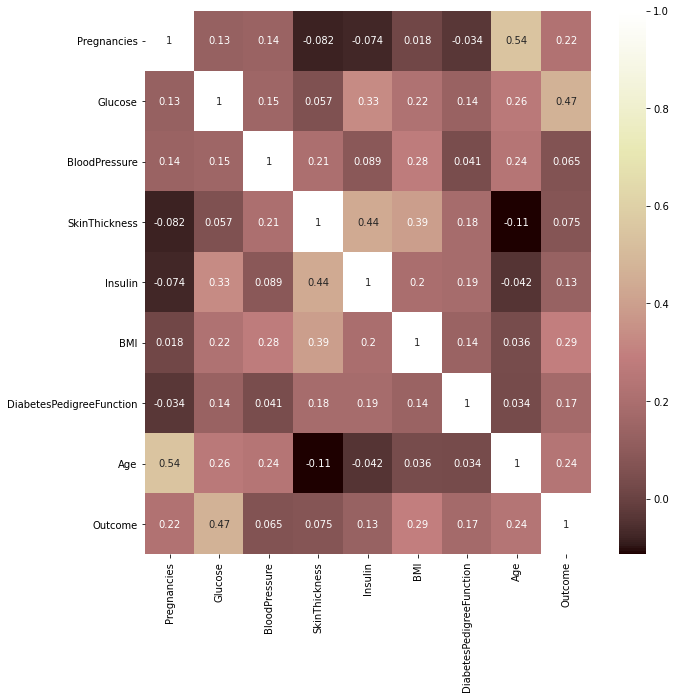

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(), cmap="pink", annot= True,)
plt.show()

Splitting of dataset

In [ ]:
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 25,random_state=0)

RandomForestClassifier

In [ ]:
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train) 
y_pred= classifier.predict(x_test)   
acc_Rf = accuracy_score(y_pred,y_test)*100
print("Accuracy : ",acc_Rf)

Accuracy :  88.0


LogisticRegression

In [ ]:
clf = LogisticRegression()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
acc_log = accuracy_score(y_pred,y_test)*100
print("Accuracy : ",acc_log)

Accuracy :  96.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


KNeighborsClassifier 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
classifier1= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 ) 
classifier1.fit(x_train, y_train) 
y_pred= classifier1.predict(x_test)  
acc_knn = accuracy_score(y_pred,y_test)*100
print("Accuracy : ",acc_knn)

Accuracy :  84.0


RandomForestClassifier with random_state

In [ ]:
classifier= RandomForestClassifier(n_estimators= 8, criterion="entropy",random_state=0) 
classifier.fit(x_train, y_train) 
y_pred= classifier.predict(x_test)   
acc_Rf_ = round(accuracy_score(y_pred,y_test),2)*100
print("Accuracy : ",acc_Rf_)

Accuracy :  88.0


LogisticRegression with specified solver and max number of iterations

In [ ]:
clf = LogisticRegression(solver='lbfgs',max_iter =1000)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
acc_log_ = round(accuracy_score(y_pred,y_test),2)*100
print("Accuracy : ",acc_log_)

Accuracy :  96.0


In [ ]:
print("Comparing the accuracy of different models")
print("Accuracy RandomForestClassifier : ",acc_Rf)
print("Accuracy LogisticRegression     : ",acc_log)
print("Accuracy KNeighborsClassifier   : ",acc_knn)
print("New Accuracy RandomForestClassifier : ",acc_Rf_)
print("New Accuracy LogisticRegression     : ",acc_log_)

Comparing the accuracy of different models
Accuracy RandomForestClassifier :  88.0
Accuracy LogisticRegression     :  96.0
Accuracy KNeighborsClassifier   :  84.0
New Accuracy RandomForestClassifier :  88.0
New Accuracy LogisticRegression     :  96.0


In [ ]:
#logistic regression performed better

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.89      0.94         9

    accuracy                           0.96        25
   macro avg       0.97      0.94      0.96        25
weighted avg       0.96      0.96      0.96        25

Accuracy Score:  0.96


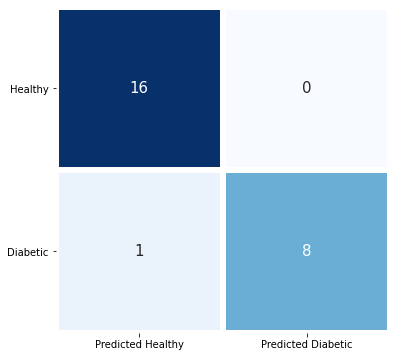

In [ ]:
#Fitting Logistic Regression Model
import sklearn.metrics
from sklearn.metrics import roc_auc_score , roc_curve, auc, average_precision_score,plot_precision_recall_curve

classifier = LogisticRegression(solver='lbfgs',max_iter =1000)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = sklearn.metrics.confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Healthy', 'Diabetic'], xticklabels = ['Predicted Healthy', 'Predicted Diabetic'])
plt.yticks(rotation = 0)
plt.show()



Hence from the results we observed that logistics regression performed better with accuracy of 96%